In [ ]:
#데이터가져오기
from google.colab import files
df=files.upload()


Saving final_test.csv to final_test.csv


1. 문제정의

- 문제가 무엇인지?
1. 시험성적이 높은 그룹의 특징은 무엇인가?
2. 중요한 특성(속성)은 무엇인가?
3. 위 데이터 특성을 분석항으로 알 수 있는것은 무엇인가?
4. 높은 성적을 받기 위해 어떠한 아이디어를 제시할 수 있는가?
5. 이 외에 추가적으로 필요한 데이터가 있는가?

가설:
기본적으로 집안에서 지원이 많은 아이들이 성적이 높을것이다.
현재 주어진 데이터의 변수는 지역, 학교타입, 학급당 학생수 등등이있는데 이중에서
학교, 지역, 학급당 학생수, lunch에 좀더 집중해보겠다.
학교, 지역 그리고 lunch는 학생의 부모의 기본적인 소득수준을 추측할수 있게해주고 학급당 학생수의 경우는 교사가 학생에게 주는 집중도에 영향을끼쳐 점수에 영향을 줄것이라 생각하였다. 

2. 자료 리뷰
- 문제와 관련된 직,간접 지식 수집
- 각종 문헌조사, 인터뷰, 관찰 벤치마킹을 통해 조사
- 문제와 관련된 주요 요소들은 무엇인지?
- 무엇이 잠재적인 원인이고 가설적인 해결방안인가?


In [ ]:
#라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [ ]:
#데이터 확인
#결측값 없음을확인
df=pd.read_csv('/content/final_test.csv')
print(df.shape)
print(df.head())
df.describe()
df.info()

(2133, 9)
  school school_setting school_type  ...  gender             lunch cs_score
0  ANKYI          Urban  Non-public  ...  Female  Does not qualify       72
1  ANKYI          Urban  Non-public  ...  Female  Does not qualify       79
2  ANKYI          Urban  Non-public  ...    Male  Does not qualify       76
3  ANKYI          Urban  Non-public  ...  Female  Does not qualify       77
4  ANKYI          Urban  Non-public  ...    Male  Does not qualify       76

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           2133 non-null   object
 1   school_setting   2133 non-null   object
 2   school_type      2133 non-null   object
 3   teaching_method  2133 non-null   object
 4   n_student        2133 non-null   int64 
 5   student_id       2133 non-null   object
 6   gender           2133 non-null   object
 

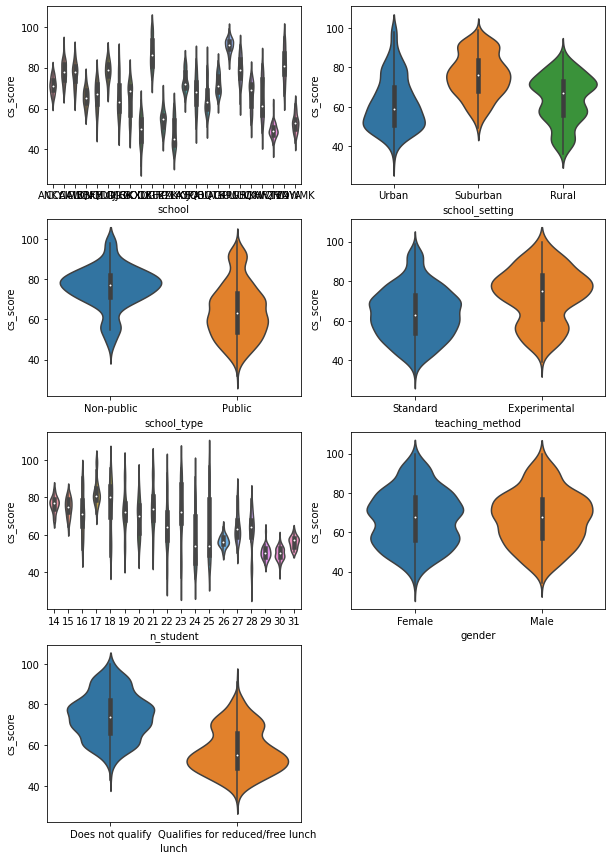

In [ ]:
#대략적인 시각화

plt.figure(figsize=(10,15))

for i,idx in zip(['school',
'school_setting',
'school_type',
'teaching_method',
'n_student',
'gender',
'lunch'],range(1,8)):
    plt.subplot(4,2,idx)
    sns.violinplot(x=i, y='cs_score',data=df)

plt.show()

일단 보이는것 위주로 이야기하면
1. 학교별 평균이 존재한다. 확실히 평균적으로 점수가 높은 학교도 존재하고 낮은 학교도 존재한다.
2. 지역에따라 어느정도 관련이 있어보이는데 생각외로 도심지역학생들이 교외나 시골 친구들보다 낮은 점수를 받는듯하다 보이는것 봤을떄는 일단은 교외>시골>도심순이다.
3. 사립의 경우가  공립에 비해 굉장히 중간층이 두텁고 높다.
4. 실험적인 학습을 하는 아이들의 경우 표준적인 수업보다 비교적 성적이 잘나오는듯 하다.
5. 비교적 학생의수가 적을수록 좋은 점수를 얻는 학생들이 많아진다. 그런데 이것이 과연 학교와 상관있을지는 좀더 따져봐야할것같다.
6. 성별은 큰 의미가 없어보인다.
7. 급식을 지원없이 먹는아이들이 좀더 높은 점수를 받는 경향을 보였다.

In [ ]:
#데이터를 숫자로 바꾸는 것이 보기에 편할것같다. 계수도 구하기도 편할듯


df['school']=df['school'].replace(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'],[23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1])
df['school_setting']=df['school_setting'].replace(['Urban','Suburban','Rural'],[3,2,1]) #도시(3), 교외(2), 시골(1)
df['school_type']=df['school_type'].replace(['Non-public','Public'],[1,0]) #사립(1), 공립(0)
df['teaching_method']=df['teaching_method'].replace(['Experimental','Standard'],[1,0]) #실험적(1),표준(0)
df['gender']=df['gender'].replace(['Male','Female'],[1,0]) #남성(1), 여성(0)
df['lunch']=df['lunch'].replace(['Does not qualify','Qualifies for reduced/free lunch'],[1,0]) #돈을냄(1), 무료,할인급식(0)


In [ ]:
df_groupby_school=df.groupby('school').agg({'school':'count','school_setting':'max','school_type':'max','teaching_method':'mean','lunch':'mean','n_student':'mean','cs_score':'mean'})
df_groupby_school_setting=df.groupby('school_setting').agg({'school_setting':'count','teaching_method':'mean','lunch':'mean','n_student':'mean','cs_score':'mean'})
df_groupby_school_type=df.groupby('school_type').agg({'school_type':'count','teaching_method':'mean','lunch':'mean','n_student':'mean','cs_score':'mean'})
df_groupby_teaching_method=df.groupby('teaching_method').agg({'teaching_method':'count','teaching_method':'mean','lunch':'mean','n_student':'mean','cs_score':'mean'})
df_groupby_n_student=df.groupby('n_student').agg({'n_student':'count','teaching_method':'mean','lunch':'mean','n_student':'mean','cs_score':'mean'})
df_groupby_lunch=df.groupby('lunch').agg({'lunch':'count','cs_score':'mean'})

In [ ]:
df.cs_score.describe()

count    2133.000000
mean       67.102203
std        13.986789
min        32.000000
25%        56.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: cs_score, dtype: float64

In [ ]:
df_groupby_school


,school,school_setting,school_type,teaching_method,lunch,n_student,cs_score
school,,,,,,,
1,117,3,0,0.256410,0.094017,29.307692,52.905983
2,69,2,0,0.681159,0.884058,23.028986,81.608696
3,114,3,0,0.526316,0.017544,28.649123,49.175439
4,100,1,0,0.410000,0.900000,20.100000,64.820000
5,51,1,1,0.686275,0.117647,17.274510,66.843137
6,84,2,1,0.392857,0.940476,16.976190,79.261905
7,128,2,0,0.468750,1.000000,21.593750,91.164062
8,87,2,0,0.000000,0.977011,21.781609,71.873563
9,149,3,0,0.355705,0.939597,25.080537,64.671141


In [ ]:
#점수 제한을 73,77을 두어도 비슷한 양상을 보여주었다.

condition = (df_groupby_school.cs_score >73) # 조건식 작성

df_groupby_school[condition]

# condition2 = (df_groupby_school.lunch >0.8) # 조건식 작성
# df_groupby_school[condition2]

,school,school_setting,school_type,teaching_method,lunch,n_student,cs_score
school,,,,,,,
2,69,2,0,0.681159,0.884058,23.028986,81.608696
6,84,2,1,0.392857,0.940476,16.976190,79.261905
7,128,2,0,0.468750,1.000000,21.593750,91.164062
11,57,1,0,0.298246,1.000000,19.140351,73.508772
14,94,3,1,0.404255,1.000000,19.063830,87.223404
18,46,1,1,1.000000,0.760870,15.565217,78.608696
21,74,3,1,0.229730,0.986486,18.648649,76.945946
22,109,2,1,0.633028,0.513761,18.412844,78.110092


In [ ]:
df_groupby_school_setting

,school_setting,teaching_method,lunch,n_student,cs_score
school_setting,,,,,
1,510,0.394118,0.529412,20.015686,64.050980
2,717,0.396095,0.656904,21.683403,76.037657
3,906,0.303532,0.523179,25.242826,61.748344


In [ ]:
df_groupby_school_type

,school_type,teaching_method,lunch,n_student,cs_score
school_type,,,,,
0,1582,0.312895,0.519595,24.164349,64.016435
1,551,0.480944,0.713249,18.869328,75.961887


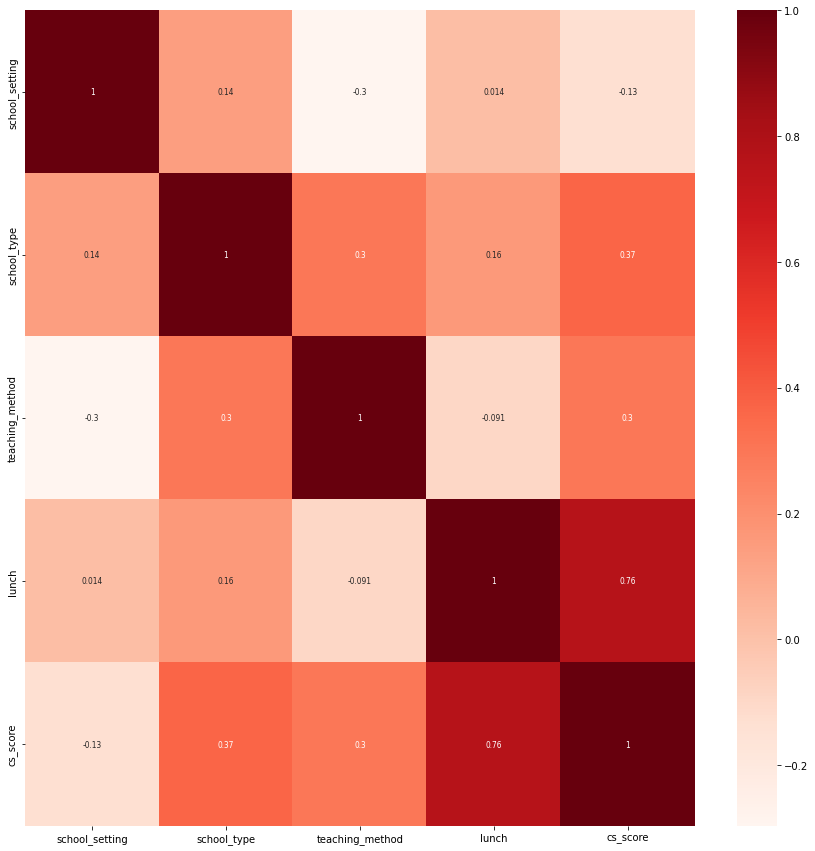

In [ ]:
#학교타입, 학교위치, 점심지원등이 꽤나 높은 상관도를 갖는것으로 나왔다.

plt.figure(figsize=(15,15))
sns.heatmap(df_groupby_school.corr(),cmap="Reds",annot=True,annot_kws={'size':7.5}) #annot=상관도 표현
plt.show()

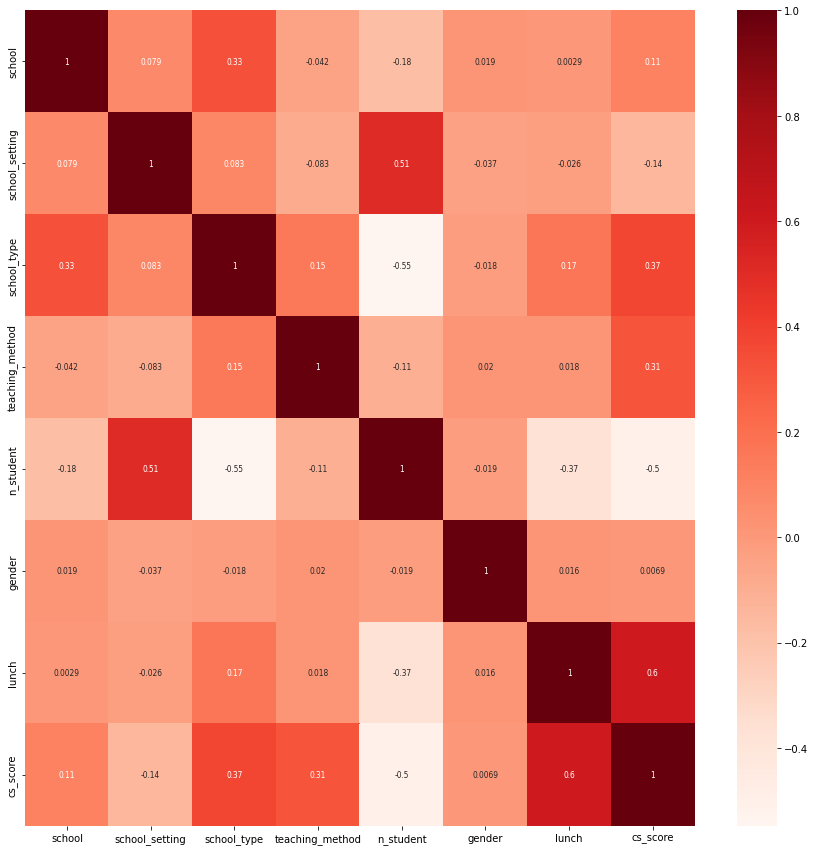

In [ ]:
#cs점수와 학급당 학생수가 반비례관계라는 것을 추측할수 있다.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap="Reds",annot=True,annot_kws={'size':7.5}) #annot=상관도 표현
plt.show()

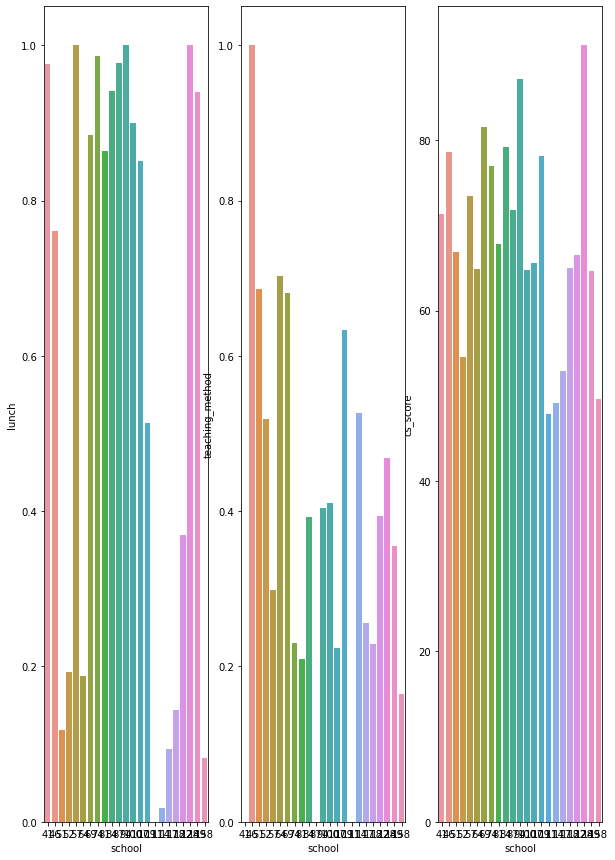

In [ ]:
plt.figure(figsize=(10,15))


plt.subplot(1,3,1)
sns.barplot(x='school', y='lunch',data=df_groupby_school)

plt.subplot(1,3,2)
sns.barplot(x='school', y='teaching_method',data=df_groupby_school)


plt.subplot(1,3,3)
sns.barplot(x='school', y='cs_score',data=df_groupby_school)


plt.show()

결론:
1.시험성적이 높은 그룹의 특징은 무엇인가?
- 일반적으로 학생당 학급수가 낮고 점심의 지원을 받지 않는 친구들이다. 즉, 어느정도 집안 재력이 된다고 생각할수있다. 하지만 이는 정책적으로 해결할수 없는 부분이니 일단 학생당 학급수를 낮추는것이 하나의 방법이라고 생각할수 있다. 
- 학교가 사립인 경우가 일반적이었다.

중요한 특성(속성)은 무엇인가?
- 학교가 사립인지 아닌지
- 가르치는 방식
- 점심의 지원 (학생 가족의 재정적 여유)
- 학생당 학급수
- 지역

위 데이터 특성을 분석항으로 알 수 있는것은 무엇인가?
- 사립학교의 경우 더 학생들의 평균 성적이 높았다.
- 실험적인 방식의 수업을 들은 학생들의 평균성적이 높았다.
- 점심 지원을 받지 않는 학생들의 평균성적이 높았다.
- 일반적으로 학생당 학급수가 낮을수록 평균성적이 높은현상을 보여준다.
- 지역에따라 성적의 분포가 다르다는것을 알수있다.

높은 성적을 받기 위해 어떠한 아이디어를 제시할 수 있는가?
- 일단 정책적으로는 학생당 학급수를 줄여야한다.

- 실험적인 방식이 꽤나 성공적인것 같다. 그렇다면 실험적인 방식에서 
어떤요인이 학생들의 성적을 올린 요인인지 수업방식에대해 분석이 필요하다.

- 왜 사립학교의 아이들의 점수가 높았을까? 사실 여러가지 요인이 전부겹친다.
사립의 경우 공립보다 학급당 학생의수가 낮았고, 점심 지원을 받는 아이들이 적었고, 실험적인 수업을 하는경우가 많았다. 이런 요인들이 합쳐져서 평균적으로 더 높은 점수를 받는듯 했다.

- 하지만 그렇다고해서 위의것들이 압도적으로 영향력있는 요인들이라고 생각하긴 힘들다. 지역별 아이들의 성적을 보았을때 학급당 학생수가 도심의 경우가 더 낮았음에도 불구하고 교외학생들의 평균적인 점수가 압도적으로 높았기 때문이다. 오히려 이는 지역적인 특성이 학생들의 점수에 영향을 준다고 생각할수 있을것이다.(학교데이터 df_groupby_school을 보게되면 점수가 높은 특성 학교들이 있다는 것을 알수있다. 오히려 이런 높은 성적을 갖는 학교들의 수업방식을 분석하는것이 좀더 도움이 되지 않을까 싶다. 지역별로 소국적으로 데이터를 분리할수록 편차가 커졌다.)

-학생들의 25% 점수부분이 77점이다. 평균이 77점이 넘는 학교들을 조사해본결과 학급당 인원수가 평균적으로 25명보다 아래였으며, 대부분 점심지원을 받지 않고있었다. 또한 실험적인 수업을 하는 빈도가 다른 학교에비해 꽤나 높은것을 알수있다. 

이 외에 추가적으로 필요한 데이터가 있는가?
-실제 학생들의 재정여유(부모의 자산)가 학생의 성적에 영향을 미치는지 교차조사가 필요하다. 이를위해 가능하다면 부모의 자산 혹은 수입등을 조사해볼만하다고 생각한다. 그리고 나아가 이것이 확인되면 아이들별로 어떠한 차이(사교육의 유무같은) 때문에 성적의 차이가 나는지 확인한다.

